### List of Imports 

In [7]:
from __future__ import print_function, division

In [8]:
import pandas as pd
import numpy as np 
from pprint import pprint
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import pickle
import scipy
import patsy
import sys
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, make_scorer
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy.stats import normaltest


%matplotlib inline 

### Versions 

In [9]:
libraries = (('Matplotlib', matplotlib), ('Numpy', np), ('Pandas', pd), ('Scipy', scipy), ('Sklearn', sklearn))

print("Python Version:", sys.version, '\n')
for lib in libraries:
    print('{0} Version: {1}'.format(lib[0], lib[1].__version__))

Python Version: 3.6.2 |Continuum Analytics, Inc.| (default, Jul 20 2017, 13:14:59) 
[GCC 4.2.1 Compatible Apple LLVM 6.0 (clang-600.0.57)] 

Matplotlib Version: 2.0.2
Numpy Version: 1.13.1
Pandas Version: 0.20.3
Scipy Version: 0.19.1
Sklearn Version: 0.19.0


### Read Data 

In [10]:
with open('../../Data/movies_clean.pickle', 'rb') as f:
    movies_df = pickle.load(f)

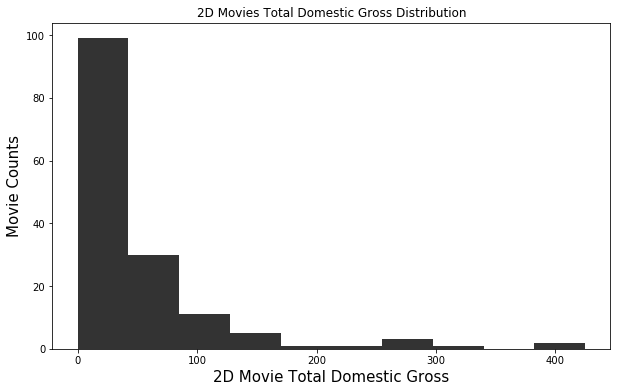

In [11]:
plt.figure(figsize=(10, 6))
plt.hist(movies_df_2D.DomesticTotalGross,bins=10,alpha=0.8,color='k')
plt.xlabel('2D Movie Total Domestic Gross', fontsize=15)
plt.ylabel('Movie Counts', fontsize=15)
plt.title('2D Movies Total Domestic Gross Distribution')

plt.savefig('../../Images/model_2d hist.png', dpi=200, bbox_inches = 'tight')

In [12]:
movies_df_2D = movies_df[movies_df['Genre_3D']==0]

In [13]:
movies_df_2D.corr().head()

,Runtime (mins),Opening Weekend Gross ($),DomesticTotalGross,Release Month_2,Release Month_3,Release Month_4,Release Month_5,Release Month_6,Release Month_7,Release Month_8,...,Director_Above_20,Director_Above_40,Director_Below_1,Actors Rank_2,Actors Rank_3,Actors Rank_4,Actors Rank_5,Actors Rank_6,Actors Rank_7,Actors Rank_8
Runtime (mins),1.000000,0.531271,0.533883,-0.026101,0.075429,0.003570,-0.030761,-0.055738,0.048847,-0.084534,...,0.373642,0.135093,-0.374897,-0.008911,0.065679,0.048430,0.156759,0.272311,0.287290,NaN
Opening Weekend Gross ($),0.531271,1.000000,0.969206,0.028563,0.049551,-0.101057,-0.040810,-0.033936,0.138513,-0.054526,...,0.548772,0.337929,-0.540264,0.014341,0.010905,0.078135,0.144392,0.531757,0.514300,NaN
DomesticTotalGross,0.533883,0.969206,1.000000,0.001646,0.060203,-0.109657,-0.060774,-0.009696,0.190368,-0.048145,...,0.592227,0.342280,-0.549339,0.040415,0.004305,0.084396,0.240467,0.473025,0.544756,NaN
Release Month_2,-0.026101,0.028563,0.001646,1.000000,-0.144887,-0.116563,-0.088388,-0.116563,-0.098403,-0.093495,...,-0.088388,-0.040689,-0.069338,-0.148712,-0.083045,-0.040689,-0.040689,-0.040689,-0.050000,NaN
Release Month_3,0.075429,0.049551,0.060203,-0.144887,1.000000,-0.135108,-0.102451,-0.135108,-0.114059,-0.108370,...,-0.023284,0.116836,0.066487,-0.068131,-0.012579,0.280835,-0.047163,0.116836,-0.057955,NaN


In [14]:
movies_df_2D.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 153 entries, 0 to 207
Data columns (total 34 columns):
Movie Title                  153 non-null object
Runtime (mins)               153 non-null float64
Opening Weekend Gross ($)    153 non-null float64
DomesticTotalGross           153 non-null float64
Release Month_2              153 non-null uint8
Release Month_3              153 non-null uint8
Release Month_4              153 non-null uint8
Release Month_5              153 non-null uint8
Release Month_6              153 non-null uint8
Release Month_7              153 non-null uint8
Release Month_8              153 non-null uint8
Release Month_9              153 non-null uint8
Release Month_10             153 non-null uint8
Release Month_11             153 non-null uint8
Release Month_12             153 non-null uint8
MPAA_PG/PG-13                153 non-null uint8
MPAA_R                       153 non-null uint8
MPAA_Unrated                 153 non-null uint8
Genre_3D                

In [15]:
movies_df_2D.describe().head(2)

,Runtime (mins),Opening Weekend Gross ($),DomesticTotalGross,Release Month_2,Release Month_3,Release Month_4,Release Month_5,Release Month_6,Release Month_7,Release Month_8,...,Director_Above_20,Director_Above_40,Director_Below_1,Actors Rank_2,Actors Rank_3,Actors Rank_4,Actors Rank_5,Actors Rank_6,Actors Rank_7,Actors Rank_8
count,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,...,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.0
mean,108.294118,15.916196,46.320821,0.111111,0.143791,0.098039,0.058824,0.098039,0.071895,0.065359,...,0.058824,0.013072,0.509804,0.150327,0.052288,0.013072,0.013072,0.013072,0.019608,0.0


In [16]:
movies_df_2D.shape

(153, 34)

### Dataset Standardization - removes the mean and scaling to unit variance 
L1 and L2 regularizers of linear models assume that all features are centered around 0 and have variance in the same order. If a feature has a variance that is orders of magnitude larger that others, it might dominate the objective function and make the estimator unable to learn from other features correctly as expected.

In [17]:
not_y = movies_df_2D.loc[:, movies_df_2D.columns != 'DomesticTotalGross'] 
x = not_y.loc[:, not_y.columns != 'Movie Title']
x = x[[x for x in x.columns if x != 'Genre_3D']]
y = movies_df_2D.DomesticTotalGross

In [18]:
print('Model Features: ', x.columns)

Model Features:  Index(['Runtime (mins)', 'Opening Weekend Gross ($)', 'Release Month_2',
       'Release Month_3', 'Release Month_4', 'Release Month_5',
       'Release Month_6', 'Release Month_7', 'Release Month_8',
       'Release Month_9', 'Release Month_10', 'Release Month_11',
       'Release Month_12', 'MPAA_PG/PG-13', 'MPAA_R', 'MPAA_Unrated',
       'Prod_Budget_Medium', 'Prod_Budget_Small', 'Release_Limited',
       'Release_Wild', 'Director_Above_10', 'Director_Above_20',
       'Director_Above_40', 'Director_Below_1', 'Actors Rank_2',
       'Actors Rank_3', 'Actors Rank_4', 'Actors Rank_5', 'Actors Rank_6',
       'Actors Rank_7', 'Actors Rank_8'],
      dtype='object')


In [19]:
print('Dimensionality of features:', x.shape)
print('Dimensionality of target:', (len(y),))

Dimensionality of features: (153, 31)
Dimensionality of target: (153,)


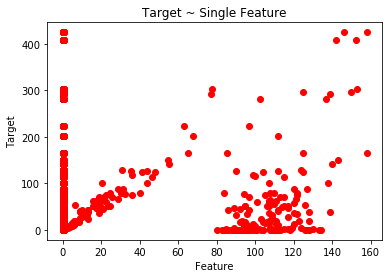

In [20]:
plt.plot(x, y, 'ro');
plt.title('Target ~ Single Feature')
plt.xlabel('Feature')
plt.ylabel('Target');

In [21]:
ssX = StandardScaler()
not_Y = movies_df_2D[[x for x in movies_df_2D.columns if x != 'DomesticTotalGross']] 
X = not_Y[[x for x in not_y.columns if x != 'Movie Title']]
X = X[[x for x in X.columns if x != 'Genre_3D']]
Y = movies_df_2D.DomesticTotalGross

### Train-Test Split - 10% of Data as Holdout for Validation

In [22]:
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.1, random_state=42)

In [23]:
X_tr = ssX.fit_transform(X_train)
X_val = ssX.transform(X_val)

In [24]:
print('Dimensionality of training features:', X_train.shape)
print('Dimensionality of training target:', Y_train.shape)

Dimensionality of training features: (137, 31)
Dimensionality of training target: (137,)


##### Regression Statistics
R2: square of the correlation coefficient and represents the estimated percentage of the variance in our target variable Y that can be explained by our regression model. Adjusted R2 also penalizes for things such as large coefficients and extra variables to try and limit overfitting so it is often a better measure of model efficacy.

P(|t|) measures our degree of belief that the coefficient for each variable should be zero. Thus, the lowest P-values represent the most likely predictors to be impacting the response.
Putting it all together, the final column returns a 95% Confidence Interval for the value of each coefficient.

In [25]:
# fit1_1.resid.plot(style='ro', figsize=(12,8))

### Linear Regression Model 1: SkLearn 

In [26]:
df_train = pd.DataFrame(X_tr)
df_train.columns = [x.columns]

In [27]:
def sklearn_lr(feature,cv = 5, scoring = 'neg_mean_absolute_error'):
    x_train = df_train[feature]
    lr = LinearRegression()
    shape = len(feature)
    x_train = x_train.values.reshape(-1,shape)
    lr.fit(x_train, Y_train)
    score_ = cross_val_score(lr, x_train, Y_train, cv = cv, scoring = scoring)
    score_mean = score_.mean()
    intercept_ = lr.intercept_
    coef_ = lr.coef_
    print('|Mean score(Neg MSE)|: ', score_mean
          , '\n', 'Intercept|: ',intercept_, '\n', '|Coefs|: ', coef_)

In [28]:
sk_m1 = sklearn_lr(['Opening Weekend Gross ($)'])

|Mean score(Neg MSE)|:  -10.6452693404 
 Intercept|:  48.5018078084 
 |Coefs|:  [ 74.89109738]


In [29]:
sk_m2 = sklearn_lr(['Opening Weekend Gross ($)', 
       'Release Month_3',
       'Release Month_7',
       'Release Month_10', 'Release Month_11',
       'Release Month_12', 'MPAA_PG/PG-13', 'MPAA_R', 'MPAA_Unrated',
       'Director_Above_20', 'Director_Above_40',
       'Actors Rank_2', 'Actors Rank_4', 'Actors Rank_5',
       'Actors Rank_7'])

|Mean score(Neg MSE)|:  -10.0685630681 
 Intercept|:  48.5018078084 
 |Coefs|:  [ 65.67647493   1.88656876   3.16605584  -1.48163793  -2.32457278
   3.7893427  -27.82919407 -29.6346365  -21.04661183   1.4518108    4.119591
   1.53021991   1.56483206   8.84568635   8.05724676]


### Linear Regression Model 2 - Lasso Regression (L1)

In [30]:
# def adj_r2(rsquare, num_data, num_features):
#     temp = (1-rsquare)*(num_data-1)
#     temp = temp/(num_data-num_features-1)
#     temp = 1 - temp
#     return temp

In [31]:
def lasso_modeling(feature, cv = 5, scoring = 'neg_mean_absolute_error'):
    x_train = df_train[feature]
    shape = len(feature)
    x_train = x_train.values.reshape(-1,shape)
    model = Lasso(max_iter=10000)
    parameters = {'alpha': [1e-5,1e-3,1e-1,1], 'fit_intercept': [True,False]}
    grid = GridSearchCV(model,parameters, cv=cv, scoring=scoring, n_jobs=1)
    grid.fit(x_train, Y_train)
    best_lasso = grid.best_estimator_
    best_score = grid.best_score_
    best_params = grid.best_params_
    best_intercept = best_lasso.intercept_
    best_coefs = best_lasso.coef_
    print('|Best Lasso|: ',best_lasso
          ,'\n','|Score (Neg MAE)|: ',best_score
          ,'\n','|Intercept|: ',best_intercept
          ,'\n','|Coefficients|: ',best_coefs)
    return best_lasso

In [32]:
# 5-fold CV, scoring with negative MAE, 1 feature: 
best_lasso_I1 = lasso_modeling(['Opening Weekend Gross ($)'])

|Best Lasso|:  Lasso(alpha=1e-05, copy_X=True, fit_intercept=True, max_iter=10000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False) 
 |Score (Neg MAE)|:  -10.6658090515 
 |Intercept|:  48.5018078084 
 |Coefficients|:  [ 74.89108738]


##### _Out of all models w/ Lasso(w/ different combination of features) tested, the one below returns the hightst R^2._

In [33]:
best_lasso_I2 = lasso_modeling(['Opening Weekend Gross ($)'
                                ,'Release Month_7'
                                ,'Release Month_10', 'Release Month_11'
                                ,'Release Month_12', 'MPAA_R'
                                ,'MPAA_Unrated','Director_Above_20'
                                ,'Director_Above_40','Actors Rank_2'
                                ,'Actors Rank_5','Actors Rank_7'])

|Best Lasso|:  Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=10000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False) 
 |Score (Neg MAE)|:  -9.90288988583 
 |Intercept|:  48.5018078084 
 |Coefficients|:  [ 66.67553718   2.33744167  -1.95152662  -3.10297137   3.16676673
  -4.2389633   -2.00120116   3.73601776   3.84606143   2.35208597
   8.05869249   6.40705023]


### Linear Regression Model 3 - Ridge Regression (L2)

In [34]:
def ridge_modeling(feature, cv = 5, scoring = 'neg_mean_absolute_error'):
    x_train = df_train[feature]
    shape = len(feature)
    x_train = x_train.values.reshape(-1,shape)
    model = Ridge(max_iter=5000)
    parameters = {'alpha': [1e-5,1e-3,1e-1,1], 'fit_intercept': [True,False]}
    grid = GridSearchCV(model,parameters, cv=cv, scoring=scoring, n_jobs=1)
    grid.fit(x_train, Y_train)
    best_ridge = grid.best_estimator_
    best_score = grid.best_score_
    best_params = grid.best_params_
    best_intercept = best_ridge.intercept_
    best_coefs = best_ridge.coef_
    print('|Best Ridge|: ',best_ridge
          ,'\n','|Score (Neg MAE)|: ',best_score
          ,'\n','|Intercept|: ',best_intercept
          ,'\n','|Coefficients|: ',best_coefs)

In [35]:
best_ridge_I1 = ridge_modeling(['Opening Weekend Gross ($)'])

|Best Ridge|:  Ridge(alpha=1e-05, copy_X=True, fit_intercept=True, max_iter=5000,
   normalize=False, random_state=None, solver='auto', tol=0.001) 
 |Score (Neg MAE)|:  -10.6658087135 
 |Intercept|:  48.5018078084 
 |Coefficients|:  [ 74.89109191]


##### _Out of all models w/ L2 (w/ different combination of features) tested, the one below returns the highest R^2._ 

In [36]:
best_ridge_I2 = ridge_modeling(['Opening Weekend Gross ($)'
                                ,'Release Month_7'
                                ,'Release Month_10', 'Release Month_11'
                                ,'Release Month_12', 'MPAA_R'
                                ,'MPAA_Unrated','Director_Above_20'
                                ,'Director_Above_40','Actors Rank_2'
                                ,'Actors Rank_5','Actors Rank_7'])

|Best Ridge|:  Ridge(alpha=1e-05, copy_X=True, fit_intercept=True, max_iter=5000,
   normalize=False, random_state=None, solver='auto', tol=0.001) 
 |Score (Neg MAE)|:  -9.93722969426 
 |Intercept|:  48.5018078084 
 |Coefficients|:  [ 66.6396541    2.37578934  -2.0626006   -3.26583956   3.25720551
  -4.38166698  -2.08433229   3.77313668   3.95037479   2.44961222
   8.15749294   6.55856019]


### Linear Regression Model 4 - ElasticNet

In [37]:
def elasticnet_modeling(feature, cv = 5, scoring = 'neg_mean_absolute_error'):
    x_train = df_train[feature]
    shape = len(feature)
    x_train = x_train.values.reshape(-1,shape)
    model = ElasticNet(max_iter=5000)
    parameters = {'alpha': [1e-5,1e-3,1e-1,1], 'fit_intercept': [True,False]}
    grid = GridSearchCV(model,parameters, cv=cv, scoring=scoring, n_jobs=1)
    grid.fit(x_train, Y_train)
    best_en = grid.best_estimator_
    best_score = grid.best_score_
    best_params = grid.best_params_
    best_intercept = best_en.intercept_
    best_coefs = best_en.coef_
    print('|Best ElesticNet|: ',best_en
          ,'\n','|Score (Neg MAS)|: ',best_score
          ,'\n','|Intercept|: ',best_intercept
          ,'\n','|Coefficients|: ',best_coefs)

In [38]:
best_en_I1 = elasticnet_modeling(['Opening Weekend Gross ($)'])

|Best ElesticNet|:  ElasticNet(alpha=1e-05, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=5000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False) 
 |Score (Neg MAS)|:  -10.665842468 
 |Intercept|:  48.5018078084 
 |Coefficients|:  [ 74.89071793]


In [39]:
best_en_I2 = elasticnet_modeling(['Opening Weekend Gross ($)'
                                ,'Release Month_7'
                                ,'Release Month_10', 'Release Month_11'
                                ,'Release Month_12', 'MPAA_R'
                                ,'MPAA_Unrated','Director_Above_20'
                                ,'Director_Above_40','Actors Rank_2'
                                ,'Actors Rank_5','Actors Rank_7'])

|Best ElesticNet|:  ElasticNet(alpha=1e-05, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=5000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False) 
 |Score (Neg MAS)|:  -9.9372901709 
 |Intercept|:  48.5018078084 
 |Coefficients|:  [ 66.63893323   2.37583486  -2.06262071  -3.26563959   3.25717218
  -4.38168166  -2.0844367    3.77336228   3.95060759   2.44964476
   8.15750193   6.55867807]


#### So the best model turns out to be best_lasso_I2, which has the lowest MAE of all that's been tested.
Model:  
Lasso  

Parameters:  
alpha=0.1, copy_X=True, fit_intercept=True, max_iter=10000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False    
   
   
Features:  
Opening Weekend Gross ($),  
Release Month_7,    
Release Month_10,  
Release Month_11,   
Release Month_12,  
Director_Above_20,   
Director_Above_40,    
Actors Rank_2,  
Actors Rank_5,   
Actors Rank_7,  
MPAA_R,    
MPAA_Unrated   
 



### Apply the best model on testing (validation) data & Make predictions

In [40]:
best_lasso_I2.coef_

array([ 66.67553718,   2.33744167,  -1.95152662,  -3.10297137,
         3.16676673,  -4.2389633 ,  -2.00120116,   3.73601776,
         3.84606143,   2.35208597,   8.05869249,   6.40705023])

In [63]:
best_lasso_I2.intercept_

48.501807808357086

In [41]:
df_val = pd.DataFrame(X_val)
df_val.columns = [x.columns]
X_val = df_val[['Opening Weekend Gross ($)'
                                ,'Release Month_7'
                                ,'Release Month_10', 'Release Month_11'
                                ,'Release Month_12', 'MPAA_R'
                                ,'MPAA_Unrated','Director_Above_20'
                                ,'Director_Above_40','Actors Rank_2'
                                ,'Actors Rank_5','Actors Rank_7']]
X_val = X_val.values.reshape(-1,12)

In [42]:
lasso_pred = best_lasso_I2.predict(X_val)
for true,pred in zip(Y_val, lasso_pred):
    resid = true - pred
    print("pred, resid:", str(pred) + ", $"+ str(resid))

pred, resid: 7.69303380856, $-3.24839680856
pred, resid: 5.32969937905, $-2.61404237905
pred, resid: 113.00101431, $-11.8009703099
pred, resid: 39.0745798638, $-2.40872586378
pred, resid: 110.437324389, $3.99668561053
pred, resid: 24.7305775643, $-5.78818156429
pred, resid: 46.1730276936, $-15.0104826936
pred, resid: 80.9426235227, $-0.927781522658
pred, resid: -6.01602578724, $6.01720678724
pred, resid: 1.17122251988, $-1.16195351988
pred, resid: 1.16983150175, $-1.14308350175
pred, resid: -1.55236451421, $3.75428751421
pred, resid: -2.29450776315, $2.30495976315
pred, resid: 24.2535179223, $2.51269507768
pred, resid: 39.4262021384, $-15.9879521384
pred, resid: 8.93433142687, $-8.63045442687


### Compare Predicted v.s. Actual

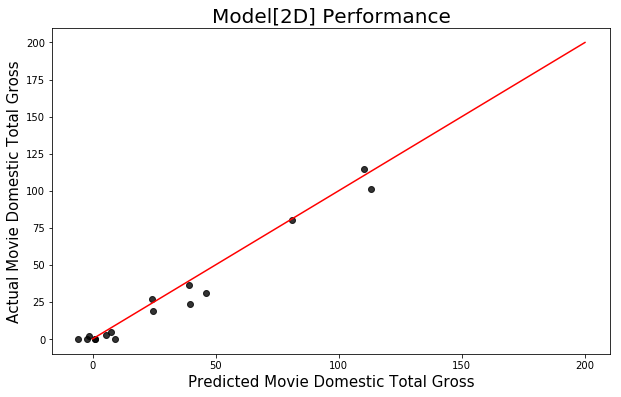

In [43]:
plt.figure(figsize=(10, 6))
plt.scatter(lasso_pred,Y_val,alpha=.8,color='k')
plt.plot(np.linspace(0,200,500),np.linspace(0,200,500),color='red')
plt.xlabel('Predicted Movie Domestic Total Gross', fontsize=15)
plt.ylabel('Actual Movie Domestic Total Gross', fontsize=15)
plt.title('Model[2D] Performance', fontsize=20)

plt.savefig('../../Images/model_2d performance.png', dpi=200, bbox_inches = 'tight')

### Plotting Residuals

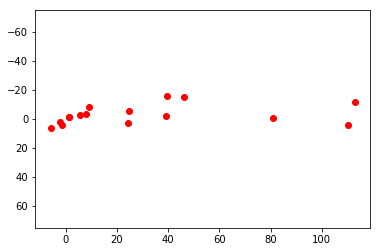

In [49]:
def residual_scatter(model, x, y, color):
    lasso_pred = model.predict(x)
    residual_ = []
    pred_ = []
    for true,pred in zip(y, lasso_pred):
        resid = true - pred
        residual_.append(resid)
        pred_.append(pred)
    residual_scatter = plt.scatter(pred_, residual_, color = color)
    plt.ylim(75,-75)

#     return (residual_scatter, residual_hist) 
#         print("pred, resid:", str(pred) + ", $"+ str(resid))
# residual_plot(best_lasso_I2, x_train, Y_train, 'k')
residual_scatter(best_lasso_I2, X_val, Y_val, 'r',)

/Users/liyuqiao/anaconda/envs/py3/lib/python3.6/site-packages/scipy/stats/stats.py:1334: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


NormaltestResult(statistic=1.7018796028094039, pvalue=0.42701343548831028)

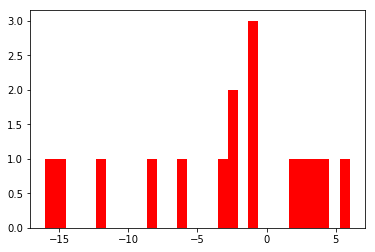

In [241]:
def residual_hist(model, x, y, color, outlier_value=260):
    lasso_pred = model.predict(x)
    residual_ = []
    for true,pred in zip(y, lasso_pred):
        resid = true - pred
        residual_.append(resid)
        residual_ = [i for i in residual_ if abs(i) < outlier_value]
    residual_hist = plt.hist(residual_, color = color, bins=30)
    return normaltest(residual_)
# residual_plot(best_lasso_I2, x_train, Y_train, 'k')

residual_hist(best_lasso_I2, X_val, Y_val, 'r',200)

### Model Results 

In [230]:
# Standard Error of the Estimate

def standard_error_estimate(true,pred,num_data):
    sse = 0
    for y,ypred in zip(true,pred):
        sse += (y-ypred)**2
    return np.sqrt(sse/(num_data-2))

standard_error_estimate(Y_val,lasso_pred,X_tr.shape[0])

2.4837041218424885

In [229]:
# adjusted r2

def adj_r2(rsquare, num_data, num_features):
    temp = (1-rsquare)*(num_data-1)
    temp = temp/(num_data-num_features-1)
    temp = 1 - temp
    return temp

adj_r2(r2_score(Y_val,lasso_pred),X_tr.shape[0],X_tr.shape[1])

0.94978836073759765

In [231]:
def test_model_results(true, X, pred):
    print("Mean Squared Error: ", mean_squared_error(true,pred))
    print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(true,pred)))
    print("Mean Absolute Error: ",mean_absolute_error(true,pred))
    r2 = r2_score(true,pred)
    print("R2: ", r2)
    print("Adj R2: ", adj_r2(r2,X.shape[0],X.shape[1]))
    print("Standard Error of Estimate: ", standard_error_estimate(true,pred,X.shape[0]))
          
test_model_results(Y_val, X_tr, lasso_pred)

Mean Squared Error:  52.049133266
Root Mean Squared Error:  7.2145085256
Mean Absolute Error:  5.45674121759
R2:  0.961233660864
Adj R2:  0.949788360738
Standard Error of Estimate:  2.48370412184


### Illustration 

In [60]:
fifty_shades_darker = X_val[4]

In [62]:
best_lasso_I2.predict(fifty_shades_darker.reshape(1, -1))

array([ 110.43732439])

In [59]:
movies_df_2D[movies_df_2D.DomesticTotalGross == 114.434010]

,Movie Title,Runtime (mins),Opening Weekend Gross ($),DomesticTotalGross,Release Month_2,Release Month_3,Release Month_4,Release Month_5,Release Month_6,Release Month_7,...,Director_Above_20,Director_Above_40,Director_Below_1,Actors Rank_2,Actors Rank_3,Actors Rank_4,Actors Rank_5,Actors Rank_6,Actors Rank_7,Actors Rank_8
37,Fifty Shades Darker,115.0,46.60725,114.43401,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
